

'''
Created on 23-Dec-2021
Dataset - adult.csv
'''


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
import io as io
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree._classes import DecisionTreeClassifier

Saving adult.csv to adult.csv


In [ ]:
#Data Visualization and Exploration
def EXP_PRE():
    
    #to read the data set to a data frame
    df = pd.read_csv(io.BytesIO(uploaded['adult.csv']))
    
    print("First five rows:\n",df.head(5))       #to get at least five rows for sanity check
    print("Describe the dataset:\n",df.describe())    #to describe the data set
    print("Shape of the dataset:\n",df.shape)         #to get shape of the data set

    #get duplicate rows
    duplicate_rows_df = df[df.duplicated()]
    print("number of duplicate rows: ", duplicate_rows_df.shape)

    #drop the duplicate rows
    df_d = df.drop_duplicates()
    print("After removing duplicates,Shape is: ",df_d.shape) # to get the shape of the data set after dropping duplicates
    
     #Split the data frame into numerical and categorical for better visualization
    numerical = ['age','fnlwgt','educational-num','capital-gain', 'capital-loss','hours-per-week']
    categorical = ['gender','workclass','education','marital-status','occupation','relationship','race','native-country','income']
    
    #visualize the numerical columns using histogrames
    df_d[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))
    plt.show()
    
    #visualize the categorical columns using count
    i=1
    for i in categorical:
        sns.countplot(x=df_d[i], hue="gender", data=df_d[categorical])
        plt.show()
        i=+1
    
    return df_d

In [ ]:
#Pre-process, transform the data and get the final data set
def PRE_PROC(df_d):
    # check for null values using isnull() function and print them 
    df_d.isnull()
    #there are no null values but we could see from the head that we do have data with '?'
    # to know the missing values present in each column
    print("Count of missing values per column:\n", df_d.isin(['?']).sum(axis=0)) 
    df_d.replace('?',np.nan,inplace=True)
    #to replace missing values with '?' as 'Unknown' there by creating a new category value "UNKNOWN"
    df_d.fillna(value='Unknown',inplace=True) 
    # to check the data set after filling the missing value
    print("Data after replacing '?' Values with UNKNOWN \n", df_d.head(10))
                                                                            
    
    # Reformat Column We are Predicting
    df_d['income']=df_d['income'].map({'<=50K': 0, '>50K': 1})

    # Reformat nominal columns to Binary Yes(1) or No(0)
    df_d["gender"] = df_d["gender"].map({"Male": 0, "Female":1})
    df_d["marital-status"] = df_d["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
    df_d["marital-status"] = df_d["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
    df_d["marital-status"] = df_d["marital-status"].map({"Married":1, "Single":0})
    df_d["marital-status"] = df_d["marital-status"].astype(int)
    print("Data after transforming \n", df_d.head(10))# to check the data set after transforming the data
    
    # since the below columns do not contribute to the result of predicted column, we can drop the data we don't want to use
    df_d.drop(labels=["workclass","education","occupation","relationship","race","native-country"], axis = 1, inplace = True)
    print('Final Dataset after Dropping unnecessary Columns:\n')
    print(df_d.head(10))
    
    return df_d

In [ ]:
#Feature selection and Train-Test data
def train_test(df_d):
    
    #get the correlation coefficient for the final data set with the required columns
    correlations = df_d.corr()
    print("Correlation is:\n",correlations)
    # plot the correlation between the columns using a heatmap
    plt.figure(figsize=(8,6))
    plt.title('Correlation Heatmap')
    a = sns.heatmap(correlations, square=True, annot=True, fmt='.2f', linecolor='black')
    a.set_xticklabels(a.get_xticklabels(), rotation=30)
    a.set_yticklabels(a.get_yticklabels(), rotation=30)           
    plt.show() 
    
    a = df_d.values
    X = a[:,0:8]  #independent columns
    Y = a[:,8]    #target column i.e income

    #split data into train data and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
    print('shape of class X train data: ')
    print(X_train.shape)
    print('shape of class Y train data: ')
    print(Y_train.shape)
    print('shape of class X test data: ')
    print(X_test.shape)
    print('shape of class Y test data: ')
    print(Y_test.shape)
    
    return X_train, Y_train, X_test, Y_test
    

In [ ]:
#Model -1 : Logistic Regression
def LOG_REG(X_train, Y_train, X_test, Y_test):
    
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train, Y_train) # model with train data
    predictions = logisticRegr.predict(X_test) # predicting using test data
    # Use score method to get accuracy of model
    print("Logistic Regression Model")
    # Use score method to get accuracy of model
    score = accuracy_score(Y_test, predictions)
    print("Accuracy Score: ", (score*100))
    cm = confusion_matrix(Y_test, predictions)
    print("confusion matrix:")
    print(cm)
    cf=classification_report(Y_test, predictions)
    print("classification report")
    print(cf)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix for Logistic Regression Model - Accuracy Score: {0}'.format(score*100)
    plt.title(all_sample_title, size = 15);
    plt.show()
    loss = log_loss(Y_test, predictions)
    print("loss value:")
    print(loss)

In [ ]:
#Model -2 : Naive Bayes classifier
def  NAV_BYS(X_train, Y_train, X_test, Y_test):
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train) # model with train data
    predictions = gnb.predict(X_test) # predicting using test data
    # Use score method to get accuracy of model
    print("Naive Bayes Model")
    # Use score method to get accuracy of model
    score = accuracy_score(Y_test, predictions)
    print("Accuracy score")
    print(score*100)
    cm = confusion_matrix(Y_test, predictions)
    print("confusion matrix")
    print(cm)
    cf=classification_report(Y_test, predictions)
    print("classification report")
    print(cf)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix for Naive Bayes classifier Model-Accuracy Score: {0}'.format(score*100)
    plt.title(all_sample_title, size = 15);
    plt.show()

In [ ]:
#Model -3 : Decision Tree    
def  DEC_TRE(X_train, Y_train, X_test, Y_test):
    
    desitree = DecisionTreeClassifier()
    desitree.fit(X_train, Y_train) # model with train data
    predictions = desitree.predict(X_test) # predicting using test data
    # Use score method to get accuracy of model
    print("DecisionTreeclassifier Model")
    # Use score method to get accuracy of model
    score = accuracy_score(Y_test, predictions)
    print("Accuracy Score: ", (score*100))
    cm = confusion_matrix(Y_test, predictions)
    print("confusion matrix:")
    print(cm)
    cf=classification_report(Y_test, predictions)
    print("classification report")
    print(cf)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix for DecisionTreeclassifier Model-Accuracy Score: {0}'.format(score*100)
    plt.title(all_sample_title, size = 15);
    plt.show()
    

First five rows:
    age  workclass  fnlwgt  ... hours-per-week  native-country income
0   25    Private  226802  ...             40   United-States  <=50K
1   38    Private   89814  ...             50   United-States  <=50K
2   28  Local-gov  336951  ...             40   United-States   >50K
3   44    Private  160323  ...             40   United-States   >50K
4   18          ?  103497  ...             30   United-States  <=50K

[5 rows x 15 columns]
Describe the dataset:
                 age        fnlwgt  ...  capital-loss  hours-per-week
count  48842.000000  4.884200e+04  ...  48842.000000    48842.000000
mean      38.643585  1.896641e+05  ...     87.502314       40.422382
std       13.710510  1.056040e+05  ...    403.004552       12.391444
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.175505e+05  ...      0.000000       40.000000
50%       37.000000  1.781445e+05  ...      0.000000       40.000000
75%       48.000000  2.376420e+05  ... 

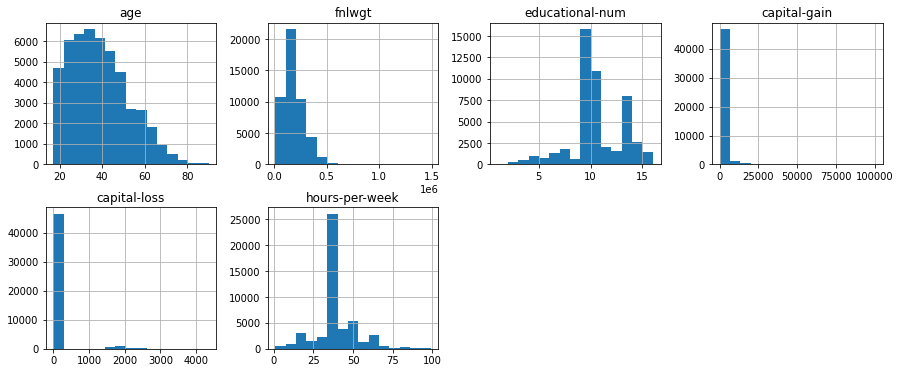

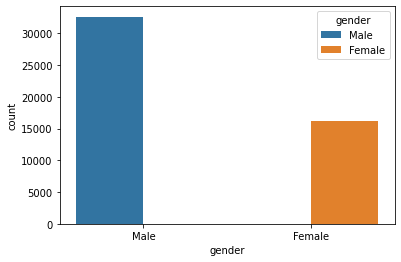

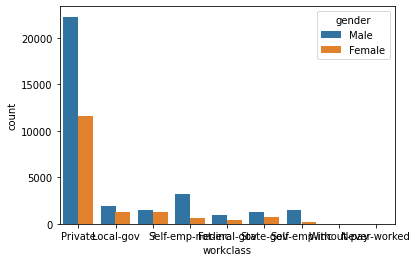

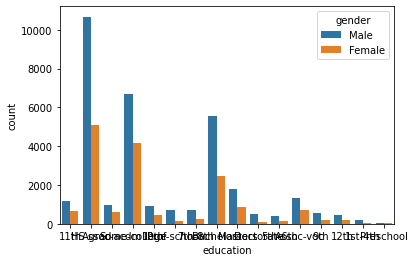

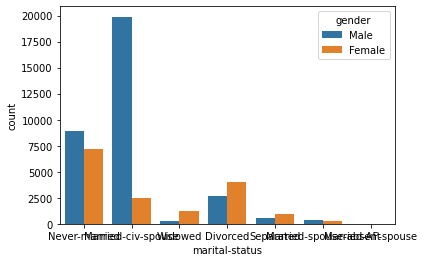

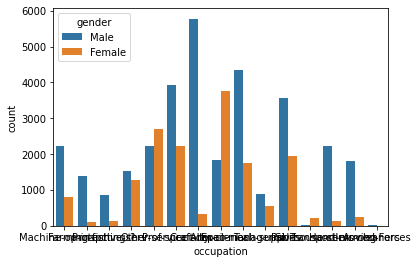

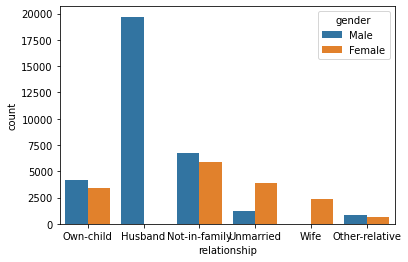

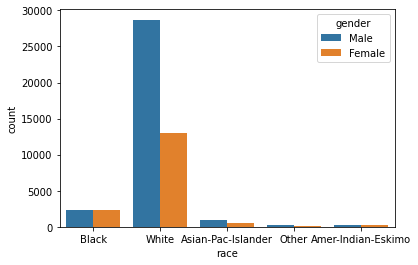

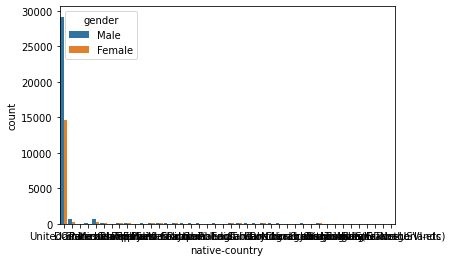

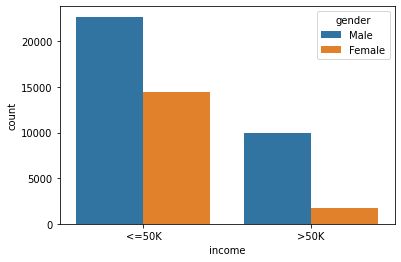

Count of missing values per column:
 age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64
Data after replacing '?' Values with UNKNOWN 
    age         workclass  fnlwgt  ... hours-per-week  native-country income
0   25           Private  226802  ...             40   United-States  <=50K
1   38           Private   89814  ...             50   United-States  <=50K
2   28         Local-gov  336951  ...             40   United-States   >50K
3   44           Private  160323  ...             40   United-States   >50K
4   18           Unknown  103497  ...             30   United-States  <=50K
5   34           Private  198693  ...             30   United-States  <=50K
6   29     

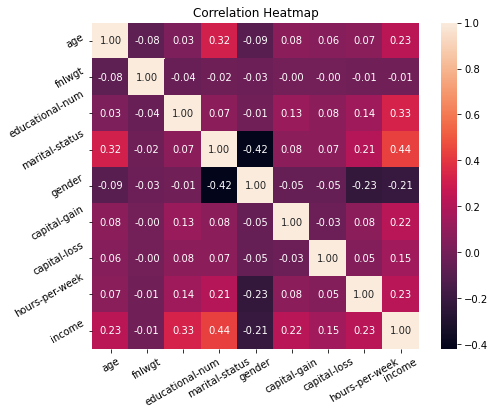

shape of class X train data: 
(39032, 8)
shape of class Y train data: 
(39032,)
shape of class X test data: 
(9758, 8)
shape of class Y test data: 
(9758,)
Logistic Regression Model
Accuracy Score:  79.41176470588235
confusion matrix:
[[7141  265]
 [1744  608]]
classification report
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      7406
           1       0.70      0.26      0.38      2352

    accuracy                           0.79      9758
   macro avg       0.75      0.61      0.63      9758
weighted avg       0.78      0.79      0.76      9758



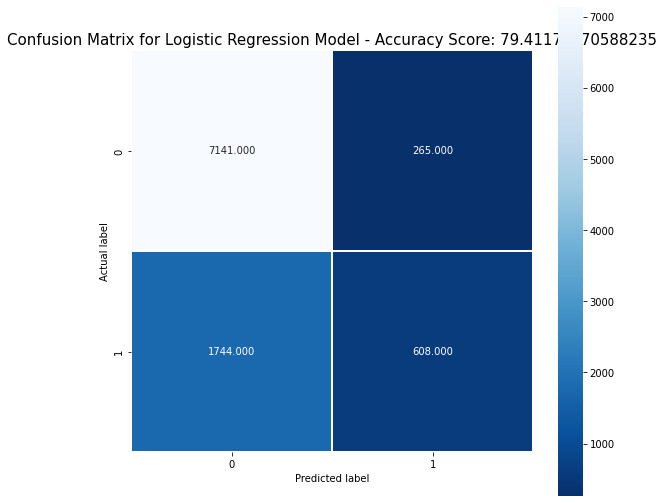

loss value:
7.110946266724181
Naive Bayes Model
Accuracy score
79.16581266653002
confusion matrix
[[7004  402]
 [1631  721]]
classification report
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7406
           1       0.64      0.31      0.41      2352

    accuracy                           0.79      9758
   macro avg       0.73      0.63      0.64      9758
weighted avg       0.77      0.79      0.76      9758



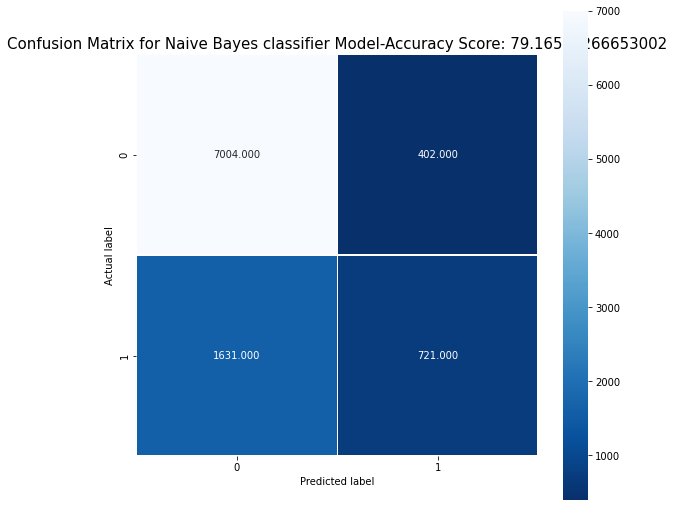

DecisionTreeclassifier Model
Accuracy Score:  80.22135683541708
confusion matrix:
[[6410  996]
 [ 934 1418]]
classification report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7406
           1       0.59      0.60      0.60      2352

    accuracy                           0.80      9758
   macro avg       0.73      0.73      0.73      9758
weighted avg       0.80      0.80      0.80      9758



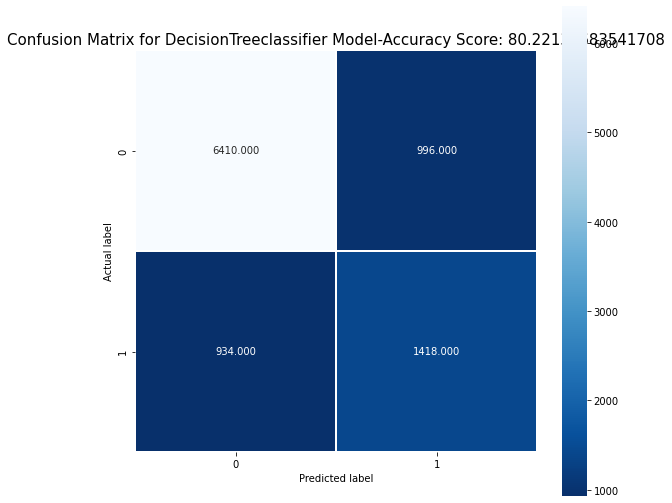

success


In [ ]:
#Driver code
if __name__ == '__main__':
                
    df_d = EXP_PRE()
    df_d = PRE_PROC(df_d)
    X_train, Y_train, X_test, Y_test = train_test(df_d)
    LOG_REG(X_train, Y_train, X_test, Y_test)
    NAV_BYS(X_train, Y_train, X_test, Y_test)
    DEC_TRE(X_train, Y_train, X_test, Y_test)
    print("success")
    

